# GRO620 - Activité procédurale 3

In [1]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/S6APP7/GRO620-E22

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive/S6APP7/GRO620-E22


## Filtrage linéaire - suite

### Q1.1

Soit cette image :

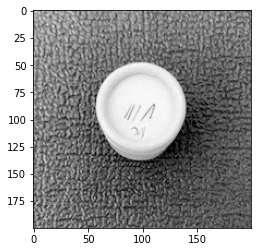

In [2]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono, cmap="gray")

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

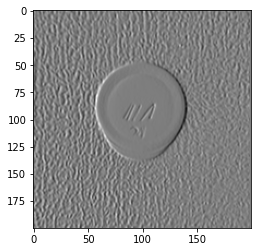

In [8]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)

img_q11_mono_sobel = cv2.Sobel(img_q11_mono, -1, 1, 0, ksize=sobel.shape[0], scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

plt.imshow(img_q11_mono_sobel, cmap="gray")


## Filtrage non-linéaire

### Q2.1

Soit cette image :

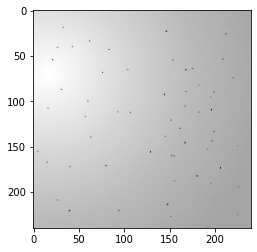

In [9]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)
plt.imshow(img_q21_mono, cmap="gray")

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

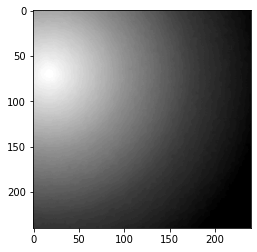

In [34]:
#img_q21_blur = cv2.GaussianBlur(src=img_q21_mono, ksize=(15, 15), sigmaX=0)
#img_q21_filt = cv2.bilateralFilter(img_q21_blur, 15, 100, 75)
img_q21_filt = cv2.medianBlur(img_q21_mono, 5)
plt.imshow(img_q21_filt, cmap="gray")


## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

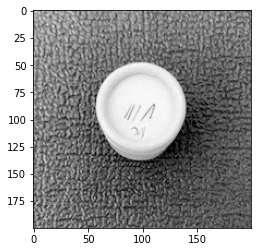

In [ ]:
img_q31 = img_q11_mono
plt.imshow(img_q31, cmap="gray")


### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

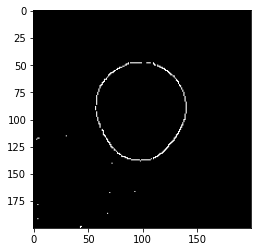

In [39]:
img_q32 = img_q11_org
img_q32_c = cv2.Canny(img_q32, 500, 600)
plt.imshow(img_q32_c, cmap="gray")


## Analyse de formes

### Q4.1

Soit cette image :

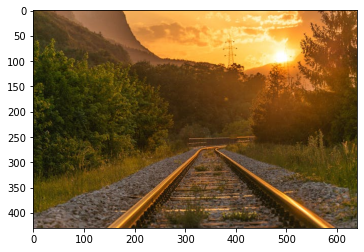

In [76]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f40bec859d0>,
 <matplotlib.image.AxesImage at 0x7f40bebfa6d0>)

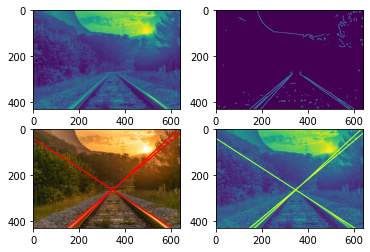

In [84]:
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_RGB2GRAY)
img_q41_blur = cv2.medianBlur(img_q41_mono, 5)
img_q41_c = cv2.Canny(img_q41_blur, 150, 200)
lines = cv2.HoughLines(img_q41_c, 1, np.pi/180, 150)

img_q41_lines = img_q41_rgb.copy()
img_q41_lines_mono = img_q41_mono.copy()

if lines is not None:
  for i in range(0, len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv2.line(img_q41_lines, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
      cv2.line(img_q41_lines_mono, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)

"""
linesP = cv2.HoughLinesP(img_q41_c, 1, np.pi / 180, 100, None, 50, 10)
img_q41_lines = img_q41_rgb.copy()

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img_q41_lines, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
"""

plt.subplot(2, 2, 1), plt.imshow(img_q41_blur)
plt.subplot(2, 2, 2), plt.imshow(img_q41_c)
plt.subplot(2, 2, 3), plt.imshow(img_q41_lines)
plt.subplot(2, 2, 4), plt.imshow(img_q41_lines_mono)

### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

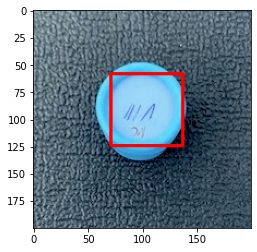

In [148]:
img_q41_out = img_q11_org.copy() # Pour le résultat
img_q11_mono = cv2.cvtColor(img_q11_org, cv2.COLOR_RGB2GRAY)
img_q11_blur = cv2.medianBlur(img_q11_mono, 15)
ret, thresh = cv2.threshold(img_q11_blur, 175, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_q11_contours = img_q11_org.copy()
cv2.drawContours(img_q11_contours, contours, -1, (255,0,0), 3)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i] = cv2.minEnclosingCircle(contours_poly[i])

for i in range(len(contours)):
    color = (255, 0, 0)
    cv2.rectangle(img_q41_out, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    #cv2.putText(img_q41_out, str(str(centers[i, 0]) + ", " + str(centers[i, 1])), \
    #            (int(boundRect[i, 0]+boundRect[i, 2]), int(boundRect[i, 1]+boundRect[i, 3])), cv2.FONT_HERSHEY_SIMPLEX, 3, color, 2, cv2.LINE_AA)

plt.imshow(img_q41_out)


